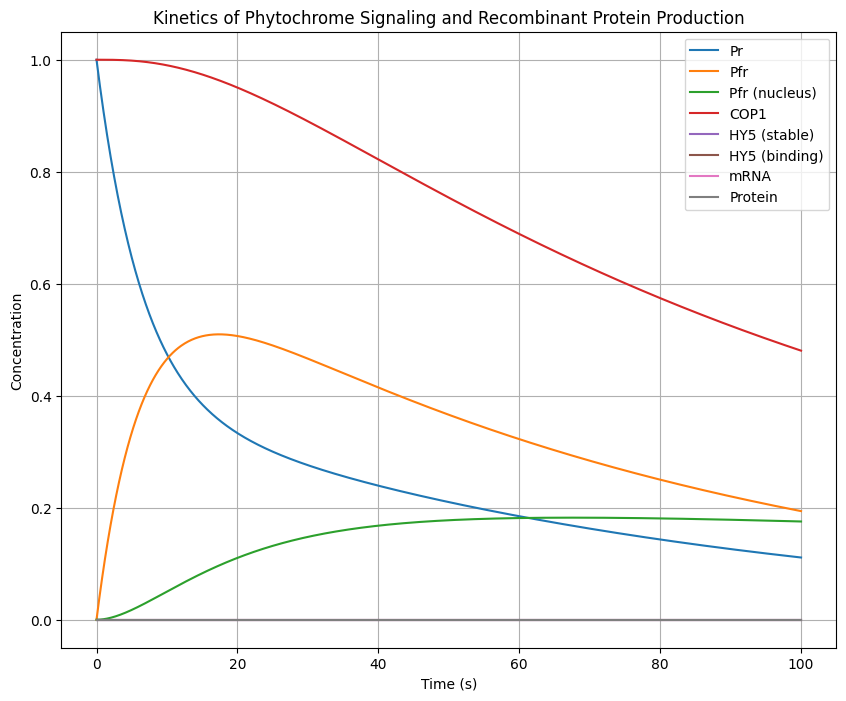

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definisikan parameter laju sementara (arbitrary values for now)
k_Pr_to_Pfr = 0.1  # Konstanta asosiasi Pr -> Pfr (s^-1)
k_Pfr_to_Pr = 0.05  # Konstanta disosiasi Pfr -> Pr (s^-1)
k_Pfr_to_nucleus = 0.02  # Laju translokasi Pfr ke nukleus (s^-1)
k_COP1_inhibition = 0.05  # Konstanta inhibisi COP1 oleh Pfr (s^-1)
k_HY5_stabilization = 0.1  # Laju stabilisasi HY5 (s^-1)
k_HY5_binding = 0.05  # Konstanta binding HY5 ke promoter (µM^-1 s^-1)
k_transcription = 0.1  # Laju transkripsi gen rekombinan (mRNA molecules/min)
k_mRNA_degradation = 0.02  # Laju degradasi mRNA (s^-1)
k_translation = 0.1  # Laju translasi mRNA menjadi protein (protein molecules/min)
k_protein_degradation = 0.01  # Laju degradasi protein (s^-1)

# Definisikan persamaan ODE
def model(y, t):
    Pr, Pfr, Pfr_nucleus, COP1, HY5_stable, HY5_binding, mRNA, protein = y
    
    # ODE untuk perubahan konsentrasi Pr dan Pfr
    dPr_dt = -k_Pr_to_Pfr * Pr + k_Pfr_to_Pr * Pfr
    dPfr_dt = k_Pr_to_Pfr * Pr - k_Pfr_to_Pr * Pfr - k_Pfr_to_nucleus * Pfr
    
    # ODE untuk translokasi Pfr ke nukleus
    dPfr_nucleus_dt = k_Pfr_to_nucleus * Pfr - k_COP1_inhibition * Pfr_nucleus * COP1
    
    # ODE untuk COP1 inhibisi oleh Pfr di nukleus
    dCOP1_dt = -k_COP1_inhibition * Pfr_nucleus * COP1
    
    # ODE untuk stabilisasi HY5 akibat inhibisi COP1
    dHY5_stable_dt = k_HY5_stabilization * HY5_stable * COP1 - k_HY5_binding * HY5_stable
    
    # ODE untuk binding HY5 ke promoter
    dHY5_binding_dt = k_HY5_binding * HY5_stable
    
    # ODE untuk transkripsi mRNA gen rekombinan
    dmRNA_dt = k_transcription * HY5_binding - k_mRNA_degradation * mRNA
    
    # ODE untuk translasi mRNA menjadi protein rekombinan
    dprotein_dt = k_translation * mRNA - k_protein_degradation * protein
    
    return [dPr_dt, dPfr_dt, dPfr_nucleus_dt, dCOP1_dt, dHY5_stable_dt, dHY5_binding_dt, dmRNA_dt, dprotein_dt]

# Kondisi awal untuk [Pr, Pfr, Pfr_nucleus, COP1, HY5_stable, HY5_binding, mRNA, protein]
y0 = [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

# Waktu (dalam detik)
t = np.linspace(0, 100, 1000)

# Integrasi ODE
solution = odeint(model, y0, t)

# Plot hasil
Pr_sol = solution[:, 0]
Pfr_sol = solution[:, 1]
Pfr_nucleus_sol = solution[:, 2]
COP1_sol = solution[:, 3]
HY5_stable_sol = solution[:, 4]
HY5_binding_sol = solution[:, 5]
mRNA_sol = solution[:, 6]
protein_sol = solution[:, 7]

plt.figure(figsize=(10,8))
plt.plot(t, Pr_sol, label="Pr")
plt.plot(t, Pfr_sol, label="Pfr")
plt.plot(t, Pfr_nucleus_sol, label="Pfr (nucleus)")
plt.plot(t, COP1_sol, label="COP1")
plt.plot(t, HY5_stable_sol, label="HY5 (stable)")
plt.plot(t, HY5_binding_sol, label="HY5 (binding)")
plt.plot(t, mRNA_sol, label="mRNA")
plt.plot(t, protein_sol, label="Protein")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Concentration")
plt.title("Kinetics of Phytochrome Signaling and Recombinant Protein Production")
plt.grid(True)
plt.show()


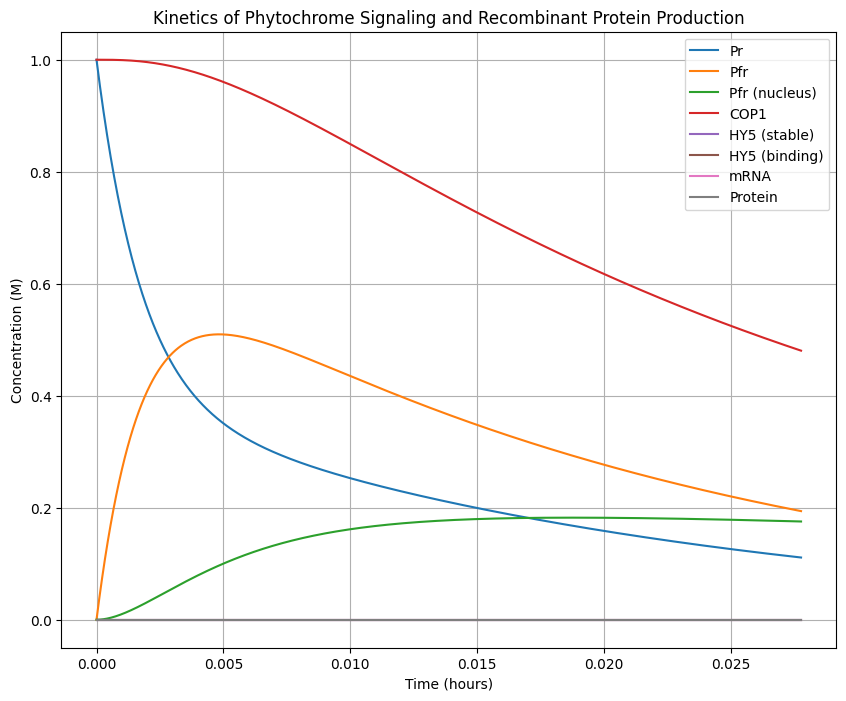

Total Molar Ekspresi Protein dalam 24 Jam: 0.0000 M


In [4]:
plt.figure(figsize=(10,8))
plt.plot(t / 3600, Pr_sol, label="Pr")  # Ubah X ke jam
plt.plot(t / 3600, Pfr_sol, label="Pfr")  # Ubah X ke jam
plt.plot(t / 3600, Pfr_nucleus_sol, label="Pfr (nucleus)")  # Ubah X ke jam
plt.plot(t / 3600, COP1_sol, label="COP1")  # Ubah X ke jam
plt.plot(t / 3600, HY5_stable_sol, label="HY5 (stable)")  # Ubah X ke jam
plt.plot(t / 3600, HY5_binding_sol, label="HY5 (binding)")  # Ubah X ke jam
plt.plot(t / 3600, mRNA_sol, label="mRNA")  # Ubah X ke jam
plt.plot(t / 3600, protein_sol, label="Protein")  # Ubah X ke jam
plt.legend()
plt.xlabel("Time (hours)")  # Label X diubah menjadi jam
plt.ylabel("Concentration (M)")  # Label Y diubah menjadi molar
plt.title("Kinetics of Phytochrome Signaling and Recombinant Protein Production")
plt.grid(True)
plt.show()

# Menghitung total molar ekspresi protein dalam satu hari
total_protein_molar = np.trapz(protein_sol, t)  # t dalam detik
print(f"Total Molar Ekspresi Protein dalam 24 Jam: {total_protein_molar:.4f} M")


## Malam Hari ##

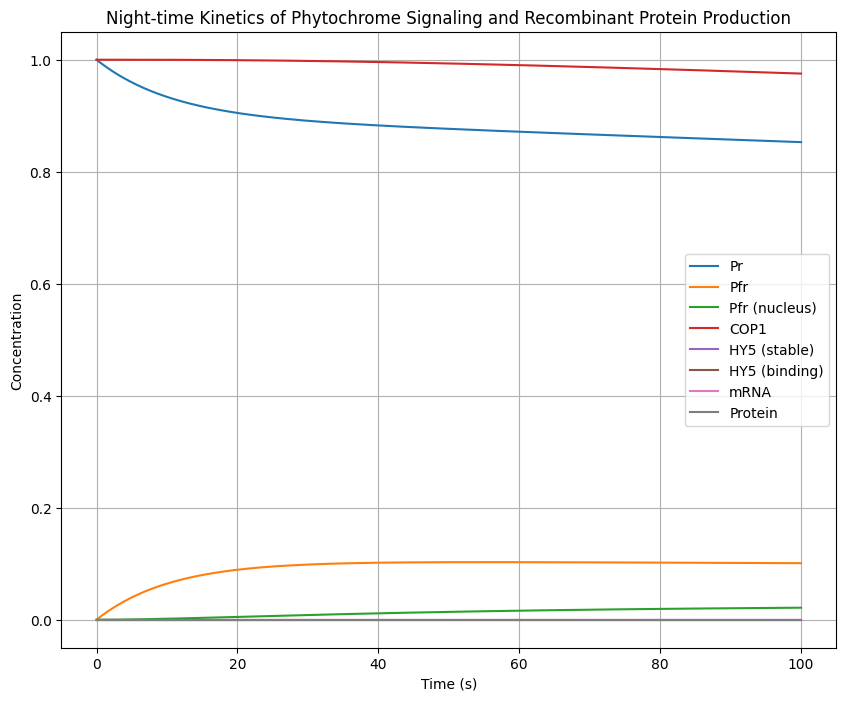

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Updated parameters for night-time conditions
k_Pr_to_Pfr = 0.01  # Reduced rate as Pr -> Pfr is minimal at night
k_Pfr_to_Pr = 0.08  # Increased Pfr -> Pr conversion in the absence of light
k_Pfr_to_nucleus = 0.005  # Reduced nuclear translocation
k_COP1_inhibition = 0.02  # Lower COP1 inhibition by Pfr
k_HY5_stabilization = 0.02  # Lower HY5 stabilization without light
k_HY5_binding = 0.05  # Same as day
k_transcription = 0.08  # Slightly reduced transcription rate
k_mRNA_degradation = 0.03  # Increased degradation during night
k_translation = 0.08  # Reduced translation rate
k_protein_degradation = 0.01  # Same degradation rate

# Defining the ODE model
def model(y, t):
    Pr, Pfr, Pfr_nucleus, COP1, HY5_stable, HY5_binding, mRNA, protein = y
    
    # ODEs for Pr and Pfr dynamics
    dPr_dt = -k_Pr_to_Pfr * Pr + k_Pfr_to_Pr * Pfr
    dPfr_dt = k_Pr_to_Pfr * Pr - k_Pfr_to_Pr * Pfr - k_Pfr_to_nucleus * Pfr
    
    # ODE for Pfr nuclear translocation
    dPfr_nucleus_dt = k_Pfr_to_nucleus * Pfr - k_COP1_inhibition * Pfr_nucleus * COP1
    
    # ODE for COP1 inhibition by nuclear Pfr
    dCOP1_dt = -k_COP1_inhibition * Pfr_nucleus * COP1
    
    # ODE for HY5 stabilization due to COP1 inhibition
    dHY5_stable_dt = k_HY5_stabilization * HY5_stable * COP1 - k_HY5_binding * HY5_stable
    
    # ODE for HY5 binding to the promoter
    dHY5_binding_dt = k_HY5_binding * HY5_stable
    
    # ODE for transcription of recombinant mRNA
    dmRNA_dt = k_transcription * HY5_binding - k_mRNA_degradation * mRNA
    
    # ODE for translation of mRNA into recombinant protein
    dprotein_dt = k_translation * mRNA - k_protein_degradation * protein
    
    return [dPr_dt, dPfr_dt, dPfr_nucleus_dt, dCOP1_dt, dHY5_stable_dt, dHY5_binding_dt, dmRNA_dt, dprotein_dt]

# Initial conditions for [Pr, Pfr, Pfr_nucleus, COP1, HY5_stable, HY5_binding, mRNA, protein]
y0 = [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

# Time in seconds
t = np.linspace(0, 100, 1000)

# Solving the ODE
solution = odeint(model, y0, t)

# Extracting solutions
Pr_sol = solution[:, 0]
Pfr_sol = solution[:, 1]
Pfr_nucleus_sol = solution[:, 2]
COP1_sol = solution[:, 3]
HY5_stable_sol = solution[:, 4]
HY5_binding_sol = solution[:, 5]
mRNA_sol = solution[:, 6]
protein_sol = solution[:, 7]

# Plotting the results
plt.figure(figsize=(10,8))
plt.plot(t, Pr_sol, label="Pr")
plt.plot(t, Pfr_sol, label="Pfr")
plt.plot(t, Pfr_nucleus_sol, label="Pfr (nucleus)")
plt.plot(t, COP1_sol, label="COP1")
plt.plot(t, HY5_stable_sol, label="HY5 (stable)")
plt.plot(t, HY5_binding_sol, label="HY5 (binding)")
plt.plot(t, mRNA_sol, label="mRNA")
plt.plot(t, protein_sol, label="Protein")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Concentration")
plt.title("Night-time Kinetics of Phytochrome Signaling and Recombinant Protein Production")
plt.grid(True)
plt.show()


Total protein expression over 24 hours: 0.0000 moles


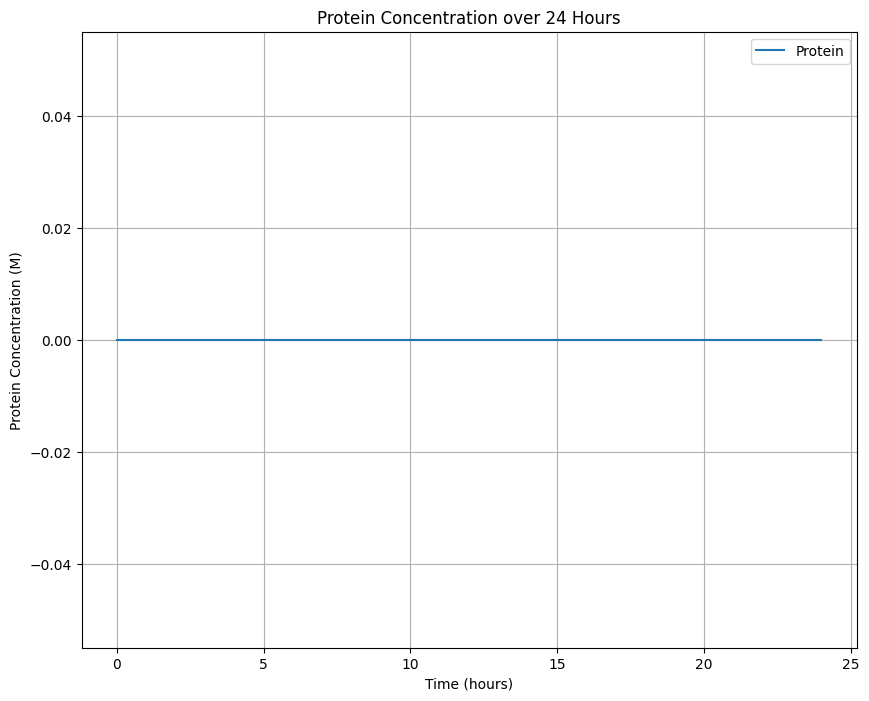

In [6]:
# Time in seconds for 24 hours
t = np.linspace(0, 86400, 1000)  # 86400 seconds = 24 hours

# Solving the ODE
solution = odeint(model, y0, t)

# Extracting protein concentration over time
protein_sol = solution[:, 7]

# Calculate total protein expression over the 24-hour period
total_protein = np.trapz(protein_sol, t)  # Integrate protein concentration over time

# Convert to Molarity if necessary
# Assuming the concentration is already in Molar (M), total_protein is in moles
# You may want to convert it to a specific volume if needed.
# For example, if you want it in a liter, total_protein would remain the same.

print(f"Total protein expression over 24 hours: {total_protein:.4f} moles")

# Plotting the results
plt.figure(figsize=(10,8))
plt.plot(t / 3600, protein_sol, label="Protein")  # Convert time to hours for the plot
plt.xlabel("Time (hours)")
plt.ylabel("Protein Concentration (M)")
plt.title("Protein Concentration over 24 Hours")
plt.grid(True)
plt.legend()
plt.show()
